# Merge Google, Twitter and Facebook Datasets from CSV

* df_google_historical_interest_ES.csv
* df_twitter_historical_interest_ES.csv


### Steps

* 1 load google and twitter ✅
* 2 merge twitter by adding column twitter_interest ✅
* 3 save merged file ✅
* 4 update column avg_interest ✅
* 5 update column min_interest ✅
* 6 update column max_interest ✅
* 7 update column is_peak ✅
* 8 Save Dataset into CSV file ✅

In [483]:
'''
IMPORTS
'''

# General
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
from datetime import datetime

# Linear Regression
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.signal
from sklearn import linear_model
from sklearn.metrics import r2_score

# Logistic Regression (Churn classification)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

In [484]:
'''
GLOBAL ENVIRONMENT TWITTER VARIABLES
'''
directory = "/Users/joan/Workspace/python/py-trends-api/"
#base_name_google = 'gtrends_historical_7cbefa1ecf3f11ebba131e0039143432_COMBINED_PEAKS'
base_name_google = 'google_trends_historical-dc3d35dcd32c11ebba131e0039143432_COMBINED_PEAKS.csv'
#base_name_twitter = 'twitter_historical-87c05256d01511eb9cc61e0039143432_PEAKS'
base_name_twitter = 'twitter_historical-0709a120d32c11eb9cc61e0039143432_PEAKS.csv'
geo_location='ES' # specific country location Spain
#out_filename = "Google_Twitter_search_interest_COMBINED_PEAKS.csv"
#kw_list = ['energia solar', 'ahorro corriente', 'ahorro energia', 'placas solares', 'energia fotovoltaica', 'energia solar fotovoltaica', 'placa energia solar']
kw_list=['energia solar', 'placas solares']

In [485]:
# Read first Google CSV and then Merge Twitter CSV
df_google = pd.read_csv(directory+base_name_google)
df_twitter = pd.read_csv(directory+base_name_twitter)

In [486]:
df_google[:10]
#df_google.shape

,date,energia solar,placas solares,isPartial,year,month,day,hour,geo_location,min_interest,max_interest,google_interest,is_peak
0,2021-01-01 00:00:00,4,20,0,2021,1,1,0,ES,4,20,12.0,0
1,2021-01-01 01:00:00,9,18,0,2021,1,1,1,ES,9,18,13.5,0
2,2021-01-01 02:00:00,19,29,0,2021,1,1,2,ES,19,29,24.0,1
3,2021-01-01 03:00:00,14,19,0,2021,1,1,3,ES,14,19,16.5,0
4,2021-01-01 04:00:00,20,40,0,2021,1,1,4,ES,20,40,30.0,1
5,2021-01-01 05:00:00,14,35,0,2021,1,1,5,ES,14,35,24.5,0
6,2021-01-01 06:00:00,17,63,0,2021,1,1,6,ES,17,63,40.0,1
7,2021-01-01 07:00:00,13,65,0,2021,1,1,7,ES,13,65,39.0,0
8,2021-01-01 08:00:00,15,52,0,2021,1,1,8,ES,15,52,33.5,0
9,2021-01-01 09:00:00,17,52,0,2021,1,1,9,ES,17,52,34.5,0


In [487]:
df_twitter[:10]
#df_twitter.shape

,date,twitter_interest,year,month,day,hour,is_peak
0,2021-06-21 07:00:00,3,2021,6,21,7,0
1,2021-06-21 08:00:00,2,2021,6,21,8,0
2,2021-06-21 09:00:00,4,2021,6,21,9,1
3,2021-06-21 10:00:00,1,2021,6,21,10,0
4,2021-06-21 12:00:00,1,2021,6,21,12,0
5,2021-06-21 14:00:00,2,2021,6,21,14,1
6,2021-06-21 15:00:00,1,2021,6,21,15,0
7,2021-06-21 16:00:00,2,2021,6,21,16,1
8,2021-06-21 17:00:00,2,2021,6,21,17,0
9,2021-06-21 19:00:00,1,2021,6,21,19,0


Peaks are: [  11   29   55   83  100  111  123  125  168  179  197  236  243  262
  267  271  291  297  314  330  336  338  365  391  450  459  504  507
  532  534  559  620  627  650  672  676  692  702  729  818  821  844
  869  918  948  971  978  989 1013 1039 1051 1132 1155 1180 1204 1300
 1326 1350 1359 1393 1397 1404 1421 1428 1446 1467 1481 1494 1516 1561
 1589 1610 1636 1660 1685 1712 1729 1749 1755 1778 1786 1805 1828 1853
 1897 1911 1928 1935 1950 1976 1996 2022 2024 2044 2048 2066 2090 2113
 2117 2120 2144 2164 2192 2217 2246 2265 2284 2313 2336 2357 2374 2402
 2404 2424 2432 2449 2456 2480 2503 2523 2525 2552 2576 2598 2641 2692
 2739 2744 2763 2772 2792 2816 2841 2862 2889 2932 2956 2981 3005 3033
 3053 3057 3081 3116 3123 3129 3153 3177 3201 3231 3268 3319 3345 3365
 3386 3423 3429 3513 3556 3581 3654 3695 3725]


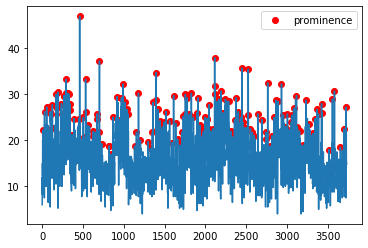

,date,energia solar,placas solares,year,month,day,hour,min_interest,max_interest,google_interest,is_peak,twitter_interest,avg_interest
0,2021-01-01 00:00:00,4.0,20.0,2021,1,1,0,4.0,20.0,12.0,0,0.0,6.00
1,2021-01-01 01:00:00,9.0,18.0,2021,1,1,1,9.0,18.0,13.5,0,0.0,6.75
2,2021-01-01 02:00:00,19.0,29.0,2021,1,1,2,19.0,29.0,24.0,0,0.0,12.00
3,2021-01-01 03:00:00,14.0,19.0,2021,1,1,3,14.0,19.0,16.5,0,0.0,8.25
4,2021-01-01 04:00:00,20.0,40.0,2021,1,1,4,20.0,40.0,30.0,0,0.0,15.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,2021-06-22 03:00:00,9.0,100.0,2021,6,22,3,9.0,100.0,54.5,1,0.0,27.25
3726,2021-06-22 04:00:00,0.0,78.0,2021,6,22,4,0.0,78.0,39.0,0,0.0,19.50
3727,2021-06-22 05:00:00,13.0,52.0,2021,6,22,5,13.0,52.0,32.5,0,0.0,16.25
3728,2021-06-22 06:00:00,13.0,46.0,2021,6,22,6,13.0,46.0,29.5,0,0.0,14.75


In [489]:
# Concat datasets
df = pd.concat([df_google, df_twitter])

# Merge duplicated indices
df = df.groupby(df.date).sum()

# Date index to column 'date'
df.reset_index(inplace=True)

# Update the min interest
#df['min_interest'] = df[df.columns[1:(len(kw_list)+1)]].min(axis=1) # Horitzontal min for the keyword columns

# Update the max interest
#df['max_interest'] = df[df.columns[1:(len(kw_list)+1)]].max(axis=1) # Horitzontal max for the keyword columns

# Update the average interest
#df['avg_interest'] = df[df.columns[1:(len(kw_list)+1)]].mean(axis=1) # Horitzontal mean for the keyword columns

df = df.drop(columns="isPartial")

# 3 Saving the merged file or you can simply return the dataframe
#print("Saving file to: " + directory+out_filename)
#df.to_csv(directory+out_filename, index = False)

# 4 update column avg_interest
df['avg_interest'] = df[['google_interest','twitter_interest']].mean(axis=1)

# 5 update column max_interest
#df['max_interest'] = df[df.columns[1:8]].max(axis=1) # Horitzontal max for the keyword columns
df['max_interest'] = df[df.columns[1:(len(kw_list)+1)]].max(axis=1) # Horitzontal max for the keyword columns

# 6 update column min_interest
#df['min_interest'] = df[df.columns[1:8]].min(axis=1) # Horitzontal min for the keyword columns
df['min_interest'] = df[df.columns[1:(len(kw_list)+1)]].min(axis=1) # Horitzontal min for the keyword columns

# 7 Peaks detection Update
x = np.array(df['avg_interest'])
peaks2, _ = find_peaks(x, prominence=10)      

# print the peaks
print('Peaks are: %s' % (peaks2))
plt.plot(peaks2, x[peaks2], "or"); plt.plot(x); plt.legend(['prominence']) # BEST !
plt.show()

# Mark registry as a peak 1 = true or not 0 = false
df['is_peak'] = 0
for i in peaks2:
    df.loc[i,['is_peak']] = 1

filter = df['is_peak'] == 1 # check updates
df[filter]

df

In [490]:
# 8 Save Dataset into CSV file
dateTimeObj = datetime.now()
current_date = dateTimeObj.strftime("%Y-%m-%d_%H%M%S")
filename = "merged_search_trends_" + current_date + ".csv"

df.to_csv(directory + filename, index = False)
print("Saved file to: " + directory + filename)